In [1]:
!git clone https://github.com/odedsc/Data_science_project

fatal: destination path 'Data_science_project' already exists and is not an empty directory.


In [2]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [3]:
%cd /content/Data_science_project

/content/Data_science_project


In [4]:
!git lfs track "Data_science_project"

"Data_science_project" already supported


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [6]:
#os.chdir('Data_science_project') # Comment out for Colab

In [7]:
df = pd.read_csv('processed_dataset.csv', low_memory=False)
pd.options.display.max_columns = None
display(df)

,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists
0,0,0,10463.0,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1
1,1,1,10471.0,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1
2,2,1,10463.0,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1
3,3,1,10463.0,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1
4,4,1,10463.0,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375.0,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1
72254,75564,123,11375.0,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,24,1,2,2,2,

In [8]:
df.shape

(72258, 65)

In [9]:
df = df.loc[(df['homeStatus'] <= 2)]
df = df.loc[(df['price'] > 100)]
df = df.drop(['zpid', 'Unnamed: 0'], axis = 1) # This is the Zillow UID
df['lnprice'] = np.log(df['price'])

In [10]:
np.random.seed(0)
y = df['lnprice']
X = df.drop(columns=['price', 'lnprice'])

# split into train and test
test_ratio = 0.2
train_indices = np.sort(np.random.choice(X.shape[0], int((1-test_ratio)*X.shape[0]), replace=False))
test_indices = np.setdiff1d(np.arange(X.shape[0]), train_indices)

train_indices = train_indices[:int(len(train_indices))]
test_indices = test_indices[:int(len(test_indices))]

X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

In [11]:
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
df.to_csv('imputed_scaled_dataset_0.csv', index=True)

### EDA

In [14]:
display_order = ["lnprice", *df.columns.drop("lnprice")]
plot_df = df[display_order]

In [15]:
# Make directory
isExist = os.path.exists('static/')
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs('static/')

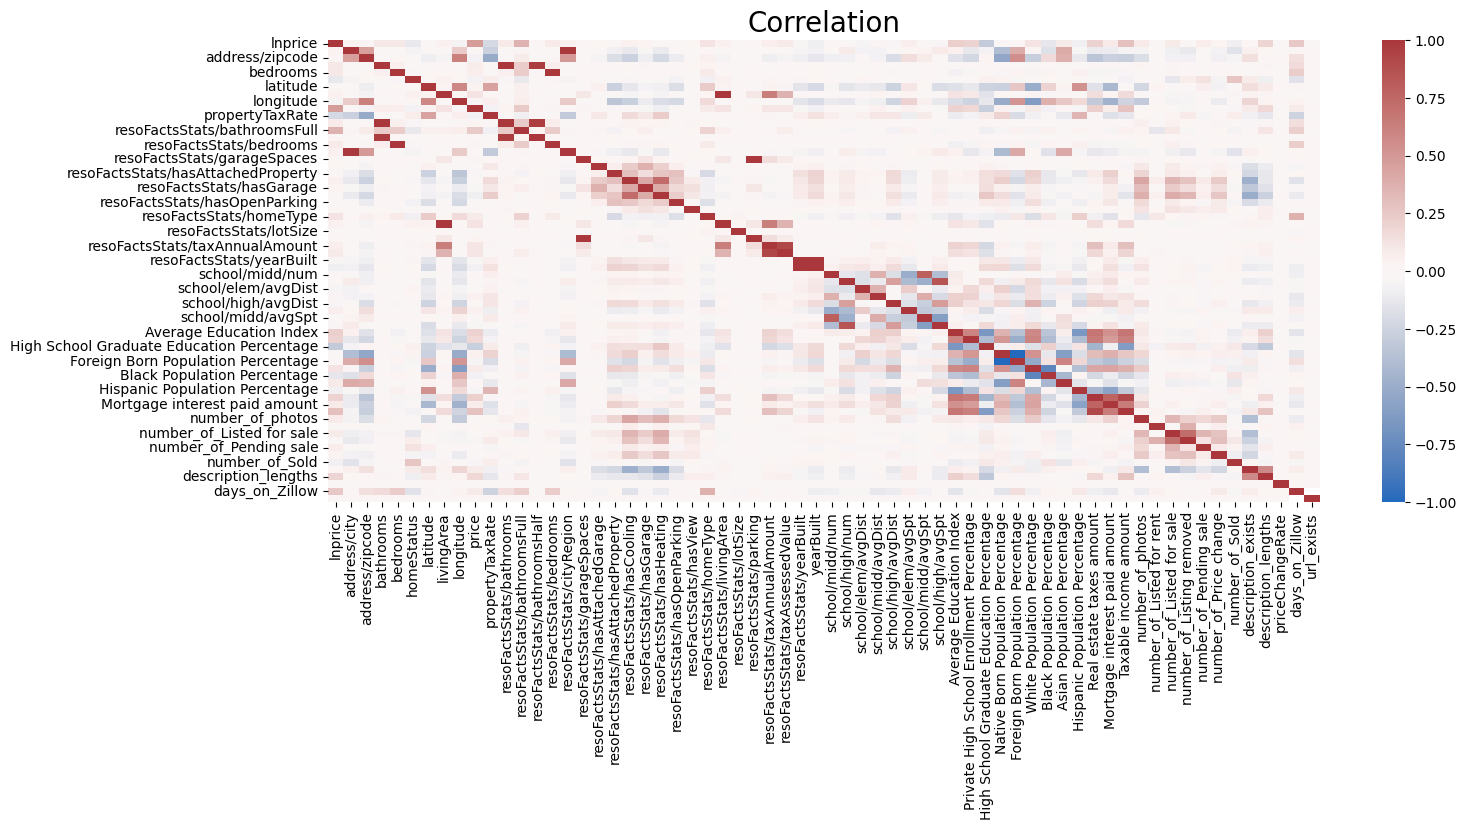

In [16]:
def plot_save_correlation():
    plt.figure(figsize=(16, 6))

    sns.heatmap(plot_df.corr(), vmin=-1, vmax=1, center=0, annot=False, cmap="vlag")

    plt.title("Correlation", fontsize=20)

    plt.savefig("static/correlation.png", format="png")
    plt.show()


plot_save_correlation()

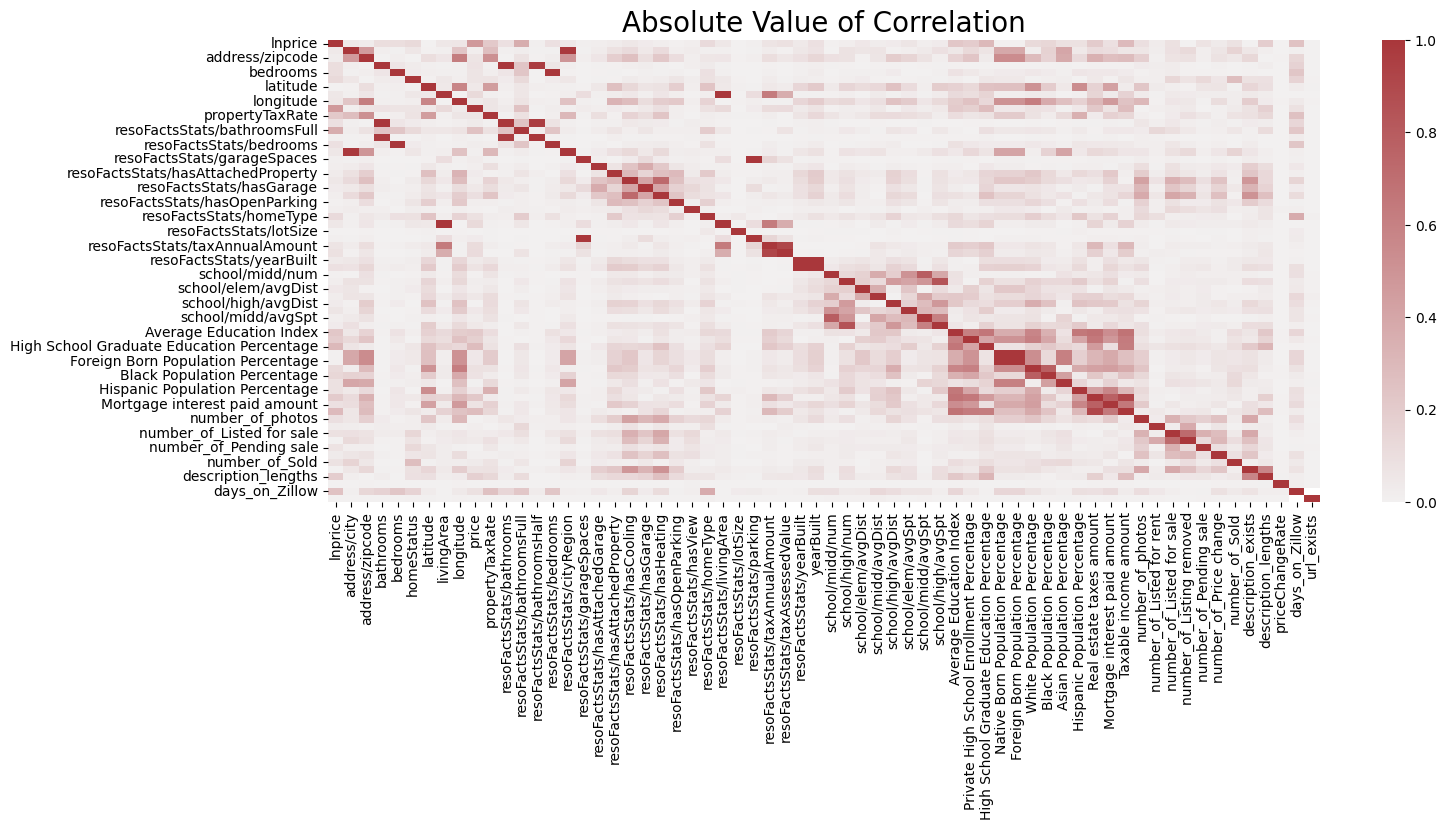

In [17]:
def plot_save_abs_correlation():
    plt.figure(figsize=(16, 6))

    sns.heatmap(
        plot_df.corr().abs(),
        vmin=0,
        vmax=1,
        annot=False,
        cmap=sns.color_palette("light:#a9373b", as_cmap=True),
    )

    plt.title("Absolute Value of Correlation", fontsize=20)

    plt.savefig("static/abs_correlation.png", format="png")
    plt.show()


plot_save_abs_correlation()

### Lasso Regression

In [18]:
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter = 10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, random_state=0)

In [19]:
# best value of penalization chosen by cross validation:
model.alpha_

0.02215525957848925

In [20]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.02215525957848925)

In [21]:
# model coefficients and names:
for beta, x in list(zip(lasso_best.coef_, X)):
  if abs(beta) > 0:
    print(x, ':', beta)

homeStatus : -0.034708461215680546
propertyTaxRate : -0.1467925864551886
resoFactsStats/bathroomsFull : 0.18678769744868187
resoFactsStats/hasAttachedGarage : 0.001892693214136838
resoFactsStats/hasCooling : 0.03712292559590319
resoFactsStats/hasGarage : 0.017639877382958902
resoFactsStats/homeType : 0.05193897226775468
yearBuilt : -0.007448041282386799
school/elem/avgDist : -0.0023167818274923585
Private High School Enrollment Percentage : 0.015039729245033403
High School Graduate Education Percentage : -0.16102989003491805
Black Population Percentage : -0.05433584071993329
Asian Population Percentage : 0.01756871010417352
Mortgage interest paid amount : -0.0069095252009963365
Taxable income amount : 0.10403584283690084
number_of_photos : 0.03895866951935405
number_of_Listed for rent : -0.018209647975822436
number_of_Listed for sale : 0.02802086468656102
number_of_Pending sale : 0.00031899264651462947
description_lengths : 0.044985647059115993
days_on_Zillow : 0.020304321838691224


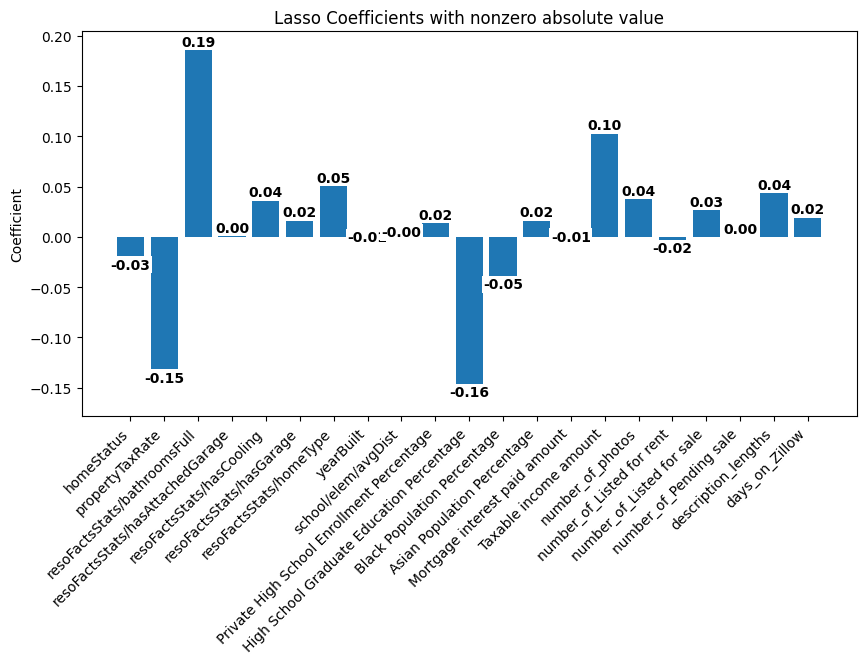

In [49]:
non_zero_coef_indices = np.nonzero(lasso_best.coef_)[0]

# Plot non-zero Lasso coefficients
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(X.columns[non_zero_coef_indices], lasso_best.coef_[non_zero_coef_indices])
x_pos = np.arange(len(X.columns[non_zero_coef_indices]))
ax.set_xticks(x_pos)
ax.set_xticklabels(X.columns[non_zero_coef_indices], rotation=45, ha='right')
ax.set_ylabel('Coefficient')
ax.set_title('Lasso Coefficients with nonzero absolute value')

# Add data labels on top of the bars
for i, v in enumerate(lasso_best.coef_[np.abs(lasso_best.coef_) > 0]):
    ax.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', pad=1))

plt.savefig("static/lasso_coeff.png", format="png")
plt.show()

In [32]:
# Model evaluation
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 22.39
R squared test set 22.62


In [33]:
# MSE
mean_squared_error(y_test, lasso_best.predict(X_test))

0.7407056540455678

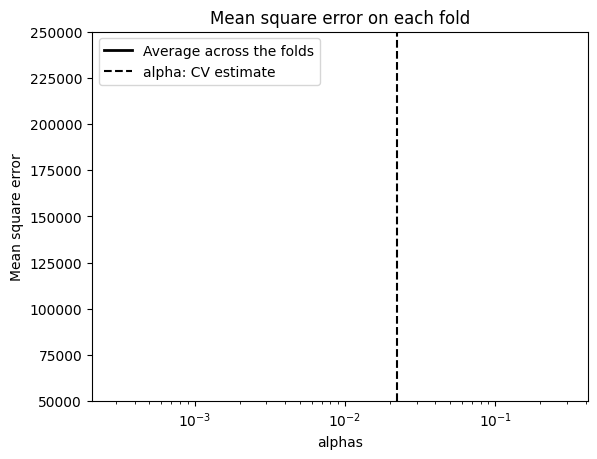

In [34]:
# Lasso path: plot results of cross-validation with mean squared erros
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

With Interactions

In [35]:
#print(df['schools/2/isAssigned'].unique())

In [36]:
# Create dummies of categorical data
dummify = ['address/city', 'address/zipcode', 'resoFactsStats/cityRegion', 'resoFactsStats/homeType']
X_new = X
X_new[dummify] = X_new[dummify].astype(str)
X_new = pd.get_dummies(X_new, prefix=dummify, columns=dummify)

In [37]:
# Columns with missing values
miss = X_new.columns[X_new.isnull().any()].tolist()
X_new[miss].isnull().sum()

bathrooms                                    16938
bedrooms                                     17425
latitude                                         1
livingArea                                    9147
longitude                                        1
propertyTaxRate                                 16
resoFactsStats/bathrooms                     13493
resoFactsStats/bathroomsFull                 17676
resoFactsStats/bathroomsHalf                 17614
resoFactsStats/bedrooms                      14379
resoFactsStats/hasCooling                     2542
resoFactsStats/hasHeating                     1082
resoFactsStats/livingArea                     9118
resoFactsStats/lotSize                       11091
resoFactsStats/taxAnnualAmount               10511
resoFactsStats/taxAssessedValue              12415
resoFactsStats/yearBuilt                      5615
yearBuilt                                     5655
school/elem/avgDist                            127
school/midd/avgDist            

In [38]:
# Dropping rows with missing values for EDA
X_new = X_new.dropna()

In [39]:
# Create Interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X_new)

print(X_new.head())

   bathrooms  bedrooms  homeStatus   latitude  livingArea  longitude  \
1        8.0       8.0           0  40.892689      7000.0 -73.910667   
2        3.0       4.0           0  40.883419      4233.0 -73.918106   
3        6.0       5.0           0  40.885033      7000.0 -73.917793   
6        3.0       3.0           0  40.892391      1864.0 -73.912140   
8        4.0       4.0           0  40.904579      3500.0 -73.911598   

   propertyTaxRate  resoFactsStats/bathrooms  resoFactsStats/bathroomsFull  \
1             0.95                       8.0                           7.0   
2             0.95                       3.0                           3.0   
3             0.95                       6.0                           6.0   
6             0.95                       3.0                           2.0   
8             0.95                       4.0                           3.0   

   resoFactsStats/bathroomsHalf  resoFactsStats/bedrooms  \
1                           1.0       

In [40]:
# Redefine training and test sets
train_indices_new = X_new.index.intersection(train_indices)
test_indices_new = X_new.index.intersection(test_indices)
#print(X_new.index, train_indices_new, train_indices)

X_train_new = X_new.loc[train_indices_new]
y_train_new = y.loc[train_indices_new]

X_test_new = X_new.loc[test_indices_new]
y_test_new = y.loc[test_indices_new]

In [41]:
# Lasso with 10 fold cross-validation
model_new = LassoCV(cv=10, random_state=0, max_iter = 10000)

# Fit model
model_new.fit(X_train_new, y_train_new)

LassoCV(cv=10, max_iter=10000, random_state=0)

In [42]:
# best value of penalization chosen by cross validation:
model_new.alpha_

1263.3107095569799

In [43]:
# Set best alpha
lasso_best_new = Lasso(alpha=model_new.alpha_)
lasso_best_new.fit(X_train_new, y_train_new)

Lasso(alpha=1263.3107095569799)

In [44]:
# model coefficients and names:
for beta, x in list(zip(lasso_best_new.coef_, X_new)):
  if abs(beta) > 0:
    print(x, ':', beta)

resoFactsStats/taxAnnualAmount : -3.4071153058597176e-06
resoFactsStats/taxAssessedValue : 1.5941102279189248e-07
Mortgage interest paid amount : -6.057904324413714e-06
Taxable income amount : 1.7811646037284734e-07


In [45]:
# Model evaluation
print('R squared training set', round(lasso_best_new.score(X_train_new, y_train_new)*100, 2))
print('R squared test set', round(lasso_best_new.score(X_test_new, y_test_new)*100, 2))

R squared training set 46.54
R squared test set 42.57


In [46]:
# MSE
mean_squared_error(y_test_new, lasso_best_new.predict(X_test_new))

0.38403332626076225

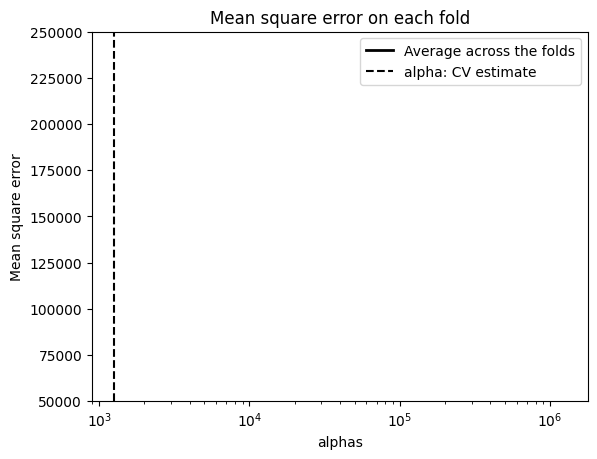

In [47]:
# Lasso path: plot results of cross-validation with mean squared erros
plt.semilogx(model_new.alphas_, model_new.mse_path_, ":")
plt.plot(
    model_new.alphas_ ,
    model_new.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_new.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);